<h1 style="text-align:center"><b>Tugas Sentiment Analysis</b></h1>

<hr>
<table>
    <tr>
        <td><b>NIM</b></td>
        <td>:</td>
        <td>20.01.53.0033</td>
    </tr>
    <tr>
        <td><b>Nama</b></td>
        <td>:</td>
        <td>MUHAMMAD FALAH ABDURRAFI</td>
    </tr>
    <tr>
        <td><b>Progdi</b></td>
        <td>:</td>
        <td>Teknik Informatika - S1</td>
    </tr>
    <tr>
        <td><b>Mata Kuliah</b></td>
        <td>:</td>
        <td>Text Mining</td>
    </tr>
    <tr>
        <td><b>Kelas</b></td>
        <td>:</td>
        <td>A1</td>
    </tr>
    <tr>
        <td><b>Dosen Pengampu</b></td>
        <td>:</td>
        <td>Dr. Drs. ERI ZULIARSO, M.Kom.</td>
    </tr>
</table>
<hr>

<br>
<h3><b>Import Libraries</b></h3>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

<br>
<h3><b>Read CSV Files</b></h3>

In [2]:
filenames = [
              "CSV/hospital_reviews.csv",
              # "CSV/hospital_reviews_04.csv",
              # "CSV/hospital_reviews_lowest_rating.csv",
              # "CSV/hospital_reviews_highest_rating.csv"
            ]

# merging two csv files
df = pd.concat(
    map(pd.read_csv, filenames), ignore_index=True)

print(len(df))
df

800


,hospital_name,name,rating,review
0,Siloam Hospitals Semarang,Eko Charnius Ilman (Eko),5.0,It is not a big hospital but cares with your s...
1,Siloam Hospitals Semarang,Theodora Rini,5.0,This place is superb among other hospitals in ...
2,Siloam Hospitals Semarang,Baskara Widhi,2.0,I'm glad that this clinic have 24 hours servic...
3,Siloam Hospitals Semarang,Irfan Murtadho,3.0,"Well organised Hospitals in Semarang, with sev..."
4,Siloam Hospitals Semarang,MsErynn8,5.0,My husband needed to flight out and thus requi...
...,...,...,...,...
795,RSIA Kusuma Pradja Semarang,Della Elistia,5.0,(Translated by Google) Very friendly health se...
796,RSIA Kusuma Pradja Semarang,Dini Putri Lestari,5.0,"(Translated by Google) Doctor Sugono is kind, ..."
797,RSIA Kusuma Pradja Semarang,andrihadi wijaya,5.0,(Translated by Google) Good service and facili...
798,RSIA Kusuma Pradja Semarang,Dewiokta Viani,5.0,(Translated by Google) Birth and pregnancy con...


<br>
<h3><b>Remove unnecessary Rows / Columns</b></h3>

In [3]:
# df.drop(df[df['hospital_name'] == "RSIA Kusuma Pradja Semarang"].index, inplace = True)
df.drop(df[df['hospital_name'] == "Primaya Hospital Semarang"].index, inplace = True)
df.drop(df[df['hospital_name'] == "Dr. Amino Gondohutomo Regional Psychiatric Hospital"].index, inplace = True)

# df.drop(df[df['rating'] == 3.0].index, inplace = True)

df.drop(columns = ['hospital_name', 'name'], inplace = True)

print(len(df))
df

600


,rating,review
0,5.0,It is not a big hospital but cares with your s...
1,5.0,This place is superb among other hospitals in ...
2,2.0,I'm glad that this clinic have 24 hours servic...
3,3.0,"Well organised Hospitals in Semarang, with sev..."
4,5.0,My husband needed to flight out and thus requi...
...,...,...
795,5.0,(Translated by Google) Very friendly health se...
796,5.0,"(Translated by Google) Doctor Sugono is kind, ..."
797,5.0,(Translated by Google) Good service and facili...
798,5.0,(Translated by Google) Birth and pregnancy con...


<br>
<h3><b>Remove these texts</b> (If exists) :</h3>
<ul>
    <li>(Translated by Google)</li>
    <li>(Original)</li>
    <li>The original text (In indonesian, before translated by google)</li>
</ul>

In [4]:
review_remove_translated = []

reviews_dict = df.to_dict('list')

for review in reviews_dict['review']:
  review_sep = str(review).split("(Translated by Google) ")
  
  # Jika terdapat (Translated by Google)
  if review_sep[0] == "":
    review_sep = ("".join(review_sep)).split("(Original)")
    review_sep = review_sep[0]
    review = "".join(review_sep)
  
  review_remove_translated.append(review)

In [5]:
reviews_dict['review'] = review_remove_translated
df = pd.DataFrame(reviews_dict)
df
# for r in reviews_dict['review']:
#   print(r,'\n')

,rating,review
0,5.0,It is not a big hospital but cares with your s...
1,5.0,This place is superb among other hospitals in ...
2,2.0,I'm glad that this clinic have 24 hours servic...
3,3.0,"Well organised Hospitals in Semarang, with sev..."
4,5.0,My husband needed to flight out and thus requi...
...,...,...
595,5.0,Very friendly health service..the doctors and ...
596,5.0,"Doctor Sugono is kind, friendly, good, detaile..."
597,5.0,Good service and facilities. The doctor is fri...
598,5.0,Birth and pregnancy control are always here. C...


<br><br>
<h1><b>Preprocessing the data</b></h1>

<br>
<h4><b>1. Cleaning the text</b></h4>

In [6]:
import string
import re

In [7]:
def clean_review(review):
    return re.sub('[^a-zA-Z]', ' ', review).lower()
  
df['cleaned_review'] = df['review'].apply(lambda x: clean_review(str(x)))
df['label'] = df['rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

<br>
<h4><b>2. Adding additional features</b> (length of, and percentage of punctuations in the text)</h4>

In [8]:
def count_punct(review):
    count = sum([1 for char in review if char in string.punctuation])
    return round(count/(len(review) - review.count(" ")), 3)*100
  
df['review_len'] = df['review'].apply(lambda x: len(str(x)) - str(x).count(" "))
df['punct'] = df['review'].apply(lambda x: count_punct(str(x)))
df

,rating,review,cleaned_review,label,review_len,punct
0,5.0,It is not a big hospital but cares with your s...,it is not a big hospital but cares with your s...,1,646,3.4
1,5.0,This place is superb among other hospitals in ...,this place is superb among other hospitals in ...,1,555,2.3
2,2.0,I'm glad that this clinic have 24 hours servic...,i m glad that this clinic have hours servic...,0,110,2.7
3,3.0,"Well organised Hospitals in Semarang, with sev...",well organised hospitals in semarang with sev...,0,224,2.2
4,5.0,My husband needed to flight out and thus requi...,my husband needed to flight out and thus requi...,1,339,4.1
...,...,...,...,...,...,...
595,5.0,Very friendly health service..the doctors and ...,very friendly health service the doctors and ...,1,61,6.6
596,5.0,"Doctor Sugono is kind, friendly, good, detaile...",doctor sugono is kind friendly good detaile...,1,144,4.9
597,5.0,Good service and facilities. The doctor is fri...,good service and facilities the doctor is fri...,1,45,4.4
598,5.0,Birth and pregnancy control are always here. C...,birth and pregnancy control are always here c...,1,57,3.5


<br>
<h4><b>3. Tokenization</b></h4>

In [9]:
def tokenize_review(review):
    tokenized_review = review.split()
    return tokenized_review
  
df['tokens'] = df['cleaned_review'].apply(lambda x: tokenize_review(x))
df.head()

,rating,review,cleaned_review,label,review_len,punct,tokens
0,5.0,It is not a big hospital but cares with your s...,it is not a big hospital but cares with your s...,1,646,3.4,"[it, is, not, a, big, hospital, but, cares, wi..."
1,5.0,This place is superb among other hospitals in ...,this place is superb among other hospitals in ...,1,555,2.3,"[this, place, is, superb, among, other, hospit..."
2,2.0,I'm glad that this clinic have 24 hours servic...,i m glad that this clinic have hours servic...,0,110,2.7,"[i, m, glad, that, this, clinic, have, hours, ..."
3,3.0,"Well organised Hospitals in Semarang, with sev...",well organised hospitals in semarang with sev...,0,224,2.2,"[well, organised, hospitals, in, semarang, wit..."
4,5.0,My husband needed to flight out and thus requi...,my husband needed to flight out and thus requi...,1,339,4.1,"[my, husband, needed, to, flight, out, and, th..."


<br>
<h4><b>4. Lemmatization and Removing Stopwords</b></h4>

In [10]:
import nltk
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

In [11]:
def lemmatize_review(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_review(x))
df.head()

,rating,review,cleaned_review,label,review_len,punct,tokens,lemmatized_review
0,5.0,It is not a big hospital but cares with your s...,it is not a big hospital but cares with your s...,1,646,3.4,"[it, is, not, a, big, hospital, but, cares, wi...",not big hospital care safety not crowded choos...
1,5.0,This place is superb among other hospitals in ...,this place is superb among other hospitals in ...,1,555,2.3,"[this, place, is, superb, among, other, hospit...",place superb among hospital semarang never exp...
2,2.0,I'm glad that this clinic have 24 hours servic...,i m glad that this clinic have hours servic...,0,110,2.7,"[i, m, glad, that, this, clinic, have, hours, ...",glad clinic hour service take long antigen tes...
3,3.0,"Well organised Hospitals in Semarang, with sev...",well organised hospitals in semarang with sev...,0,224,2.2,"[well, organised, hospitals, in, semarang, wit...",well organised hospital semarang several exper...
4,5.0,My husband needed to flight out and thus requi...,my husband needed to flight out and thus requi...,1,339,4.1,"[my, husband, needed, to, flight, out, and, th...",husband needed flight thus required covid pcr ...


<br><br>
<h1><b>EDA</b></h1>

In [12]:
#  Shape of the dataset, and breakdown of the classes
print(f"Input data has { len(df) } rows and { len(df.columns) } columns")
print(f"rating 1.0 = { len(df[df['rating']==1.0]) } rows")
print(f"rating 2.0 = { len(df[df['rating']==2.0]) } rows")
print(f"rating 3.0 = { len(df[df['rating']==3.0]) } rows")
print(f"rating 4.0 = { len(df[df['rating']==4.0]) } rows")
print(f"rating 5.0 = { len(df[df['rating']==5.0]) } rows")

Input data has 600 rows and 8 columns
rating 1.0 = 116 rows
rating 2.0 = 30 rows
rating 3.0 = 35 rows
rating 4.0 = 72 rows
rating 5.0 = 347 rows


Number of null in label: 0
Number of null in text: 5


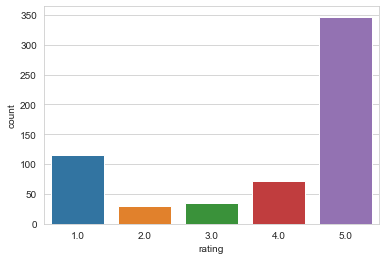

In [13]:
# Missing values in the dataset
print(f"Number of null in label: { df['rating'].isnull().sum() }")
print(f"Number of null in text: { df['review'].isnull().sum() }")
sns.countplot(x='rating', data=df);

<br><br>
<h1><b>Visualizing Word Clouds</b></h1>

In [14]:
from wordcloud import WordCloud

In [15]:
df_negative = df[ (df['rating']==1.0) | (df['rating']==2.0) | (df['rating']==3.0) ]
df_positive = df[ (df['rating']==4.0) | (df['rating']==5.0) ]

#convert to list
negative_list= df_negative['lemmatized_review'].tolist()
positive_list=df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of negative
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of positive
filtered_positive = filtered_positive.lower()

<br>
<h4><b>Word Cloud:</b> Negative Reviews</h4>

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

<br>
<h4><b>Word Cloud:</b> Positive Reviews</h4>

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

<br><br>
<h1><b>Feature Extraction from Text</b></h1>
<ul>
    <li><b>Vectorizer:</b> TF-IDF</li>
</ul>

In [88]:
X = df[['lemmatized_review', 'review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(600, 3)
(600,)


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(420, 3)
(180, 3)
(420,)
(180,)


In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,review_len,punct,0,1,2,3,4,5,6,7,...,880,881,882,883,884,885,886,887,888,889
0,264,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.248008,0.0
1,168,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,314,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,101,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,434,5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


<br><br>
<h1><b>Visualize Confusion Matrix</b></h1>
<ul>
    <li><b>Vectorizer:</b> TF-IDF</li>
</ul>

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

<hr>
<h4><b>Algorithms:</b> Multinomial Naive Bayes</h4>

              precision    recall  f1-score   support

           0       0.60      0.62      0.61        50
           1       0.85      0.84      0.84       130

    accuracy                           0.78       180
   macro avg       0.72      0.73      0.73       180
weighted avg       0.78      0.78      0.78       180



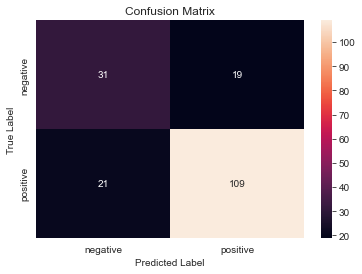

In [22]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<hr>
<h4><b>Algorithms:</b> Random Forest Classifier</h4>

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        50
           1       0.90      0.97      0.93       130

    accuracy                           0.90       180
   macro avg       0.90      0.84      0.87       180
weighted avg       0.90      0.90      0.90       180



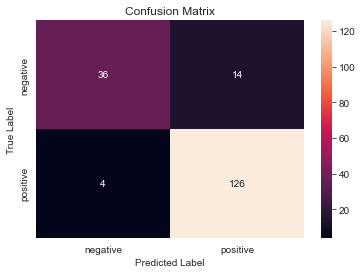

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<hr>
<h4><b>Algorithms:</b> Logistic Regression</h4>

              precision    recall  f1-score   support

           0       0.77      0.68      0.72        50
           1       0.88      0.92      0.90       130

    accuracy                           0.86       180
   macro avg       0.83      0.80      0.81       180
weighted avg       0.85      0.86      0.85       180



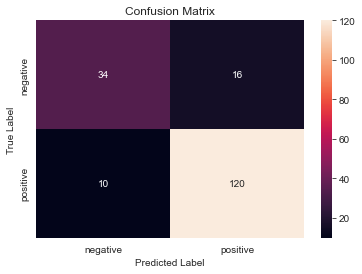

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<hr>
<h4><b>Algorithms:</b> Support Vector Machine (SVM)</h4>

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        50
           1       0.91      0.97      0.94       130

    accuracy                           0.91       180
   macro avg       0.91      0.86      0.88       180
weighted avg       0.91      0.91      0.91       180



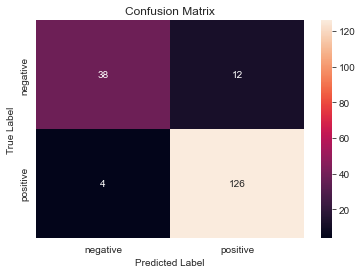

In [25]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<hr>
<h4><b>Algorithms:</b> K-Nearest Neighbor (KNN)</h4>

              precision    recall  f1-score   support

           0       0.36      0.30      0.33        50
           1       0.75      0.79      0.77       130

    accuracy                           0.66       180
   macro avg       0.55      0.55      0.55       180
weighted avg       0.64      0.66      0.65       180



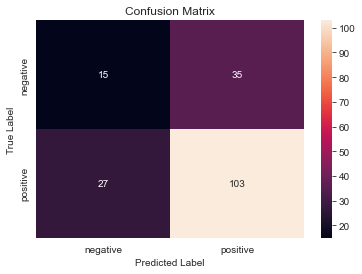

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<hr>
<h4><b>Algorithms:</b> Extra Trees Classifier</h4>

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        50
           1       0.92      0.95      0.94       130

    accuracy                           0.91       180
   macro avg       0.89      0.87      0.88       180
weighted avg       0.90      0.91      0.90       180



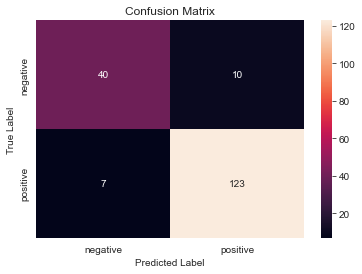

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<br><br>
<h1><b>Performing K-Fold Cross Validation</b></h1>
<ul>
    <li><b>K=</b>10</li>
</ul>

In [28]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.7761904761904762 
 precision - 0.8106979937625098 
 recall - 0.8823891625615763 
 f1 - 0.8440372496198225 

Logistic Regression
 accuracy - 0.8214285714285714 
 precision - 0.8228139447764194 
 recall - 0.9481527093596058 
 f1 - 0.879783886614835 

Random Forest
 accuracy - 0.8714285714285716 
 precision - 0.8567135642135643 
 recall - 0.9620689655172414 
 f1 - 0.9008247597707539 

SVM
 accuracy - 0.8595238095238095 
 precision - 0.8756928831218074 
 recall - 0.9307881773399014 
 f1 - 0.9010947182273137 

KNN
 accuracy - 0.6357142857142857 
 precision - 0.7162282574320051 
 recall - 0.7817733990147783 
 f1 - 0.7472042939617266 

Extra Trees
 accuracy - 0.8595238095238095 
 precision - 0.8802998860609849 
 recall - 0.9238916256157635 
 f1 - 0.9003164624591908 



<br><br>
<h1><b>Predictions</b></h1>

<hr>
<ul>
    <li><b>Vectorizer:</b> TF-IDF</li>
    <li><b>Algorithms:</b> Extra Trees Classifier</li>
</ul>

In [95]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 10)
# from sklearn.ensemble import ExtraTreesClassifier
# classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)

classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.9111111111111111

In [98]:
data = ["Bad", "Good", "I hate the service, it's really bad", "The nurse is so kind"]
vect = tfidf.transform(data).toarray()

my_pred = classifier.predict(vect)
print(my_pred)

[0 1 0 1]


<hr>
<ul>
    <li><b>Vectorizer:</b> CountVectorizer (Bag of words)</li>
    <li><b>Algorithms:</b> Multinomial Naive Bayes</li>
</ul>

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [75]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.8944444444444445

In [76]:
data = ["Bad", "Good", "I hate the service, it's really bad", "The nurse is so kind"]
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
print(my_prediction)

[0 1 0 1]
